Customer Segmentation in R
===============

Customer segmentation (basically clustering users based on their similar attributes) is an important application of unsupervised learning. Companies/businesses/individuals can utilise this to differentiate their users(relevant audience) into strategic groups.

**Let's begin!**

In [2]:
getwd()

[1] "C:/Users/rohitasoliya/Documents/New folder/R Projects"

In [7]:
customer_data_raw = read.csv("Mall_Customers.csv")

In [8]:
str(customer_data_raw)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [9]:
names(customer_data_raw)

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

In [10]:
head(customer_data_raw)

CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
<int>,<fct>,<int>,<int>,<int>
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [11]:
summary(customer_data_raw)

   CustomerID        Gender         Age        Annual.Income..k..
 Min.   :  1.00   Female:112   Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Male  : 88   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50                Median :36.00   Median : 61.50    
 Mean   :100.50                Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

In [14]:
sd(customer_data_raw$Age)

[1] 13.96901

In [16]:
summary(customer_data_raw$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [17]:
sd(customer_data_raw$Annual.Income..k..)

[1] 26.26472

In [18]:
summary(customer_data_raw$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

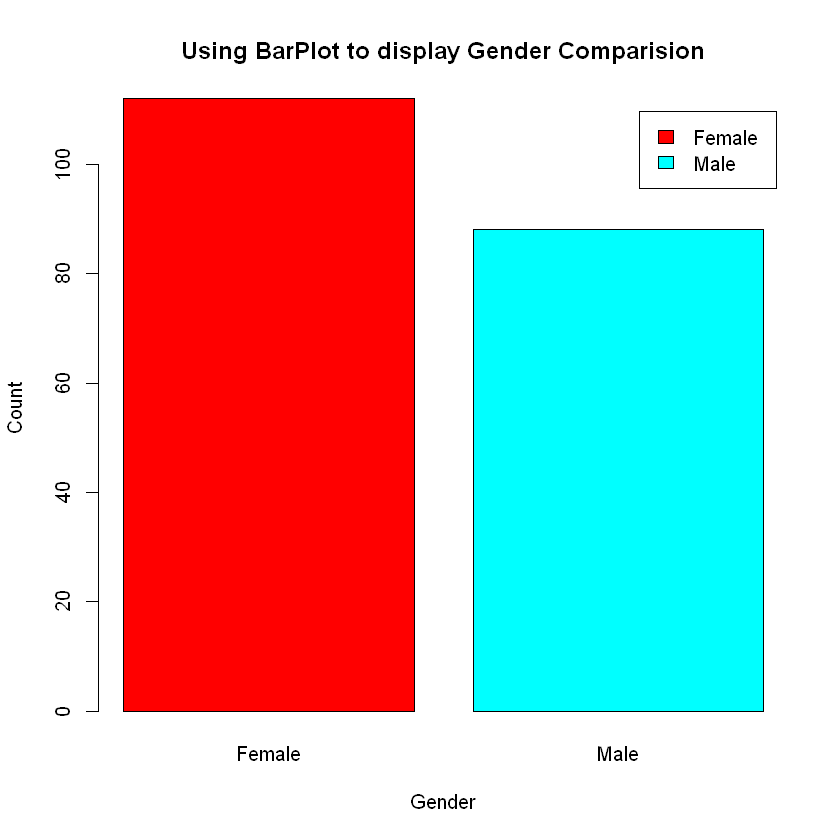

In [19]:
a=table(customer_data_raw$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))

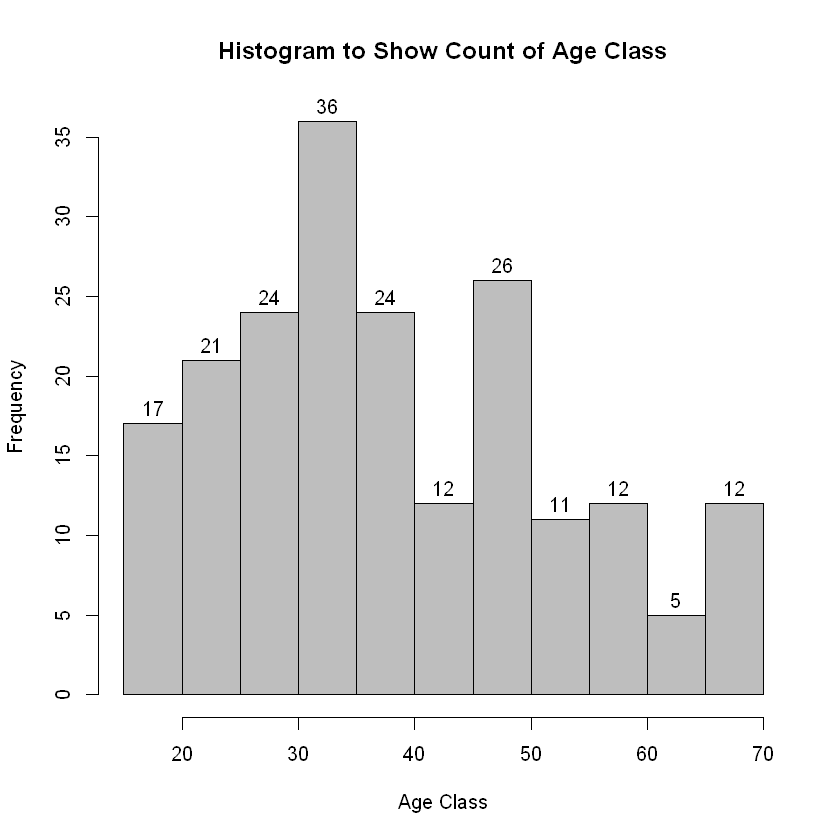

In [21]:
hist(customer_data_raw$Age,
    col="grey",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

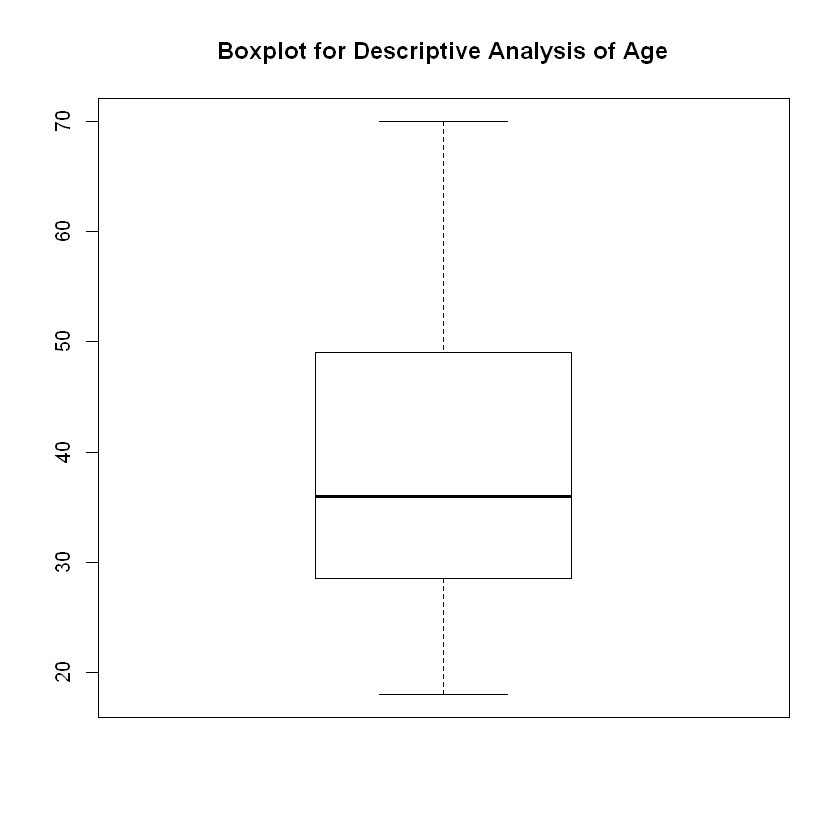

In [28]:
boxplot(customer_data_raw$Age,
       main="Boxplot for Descriptive Analysis of Age")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

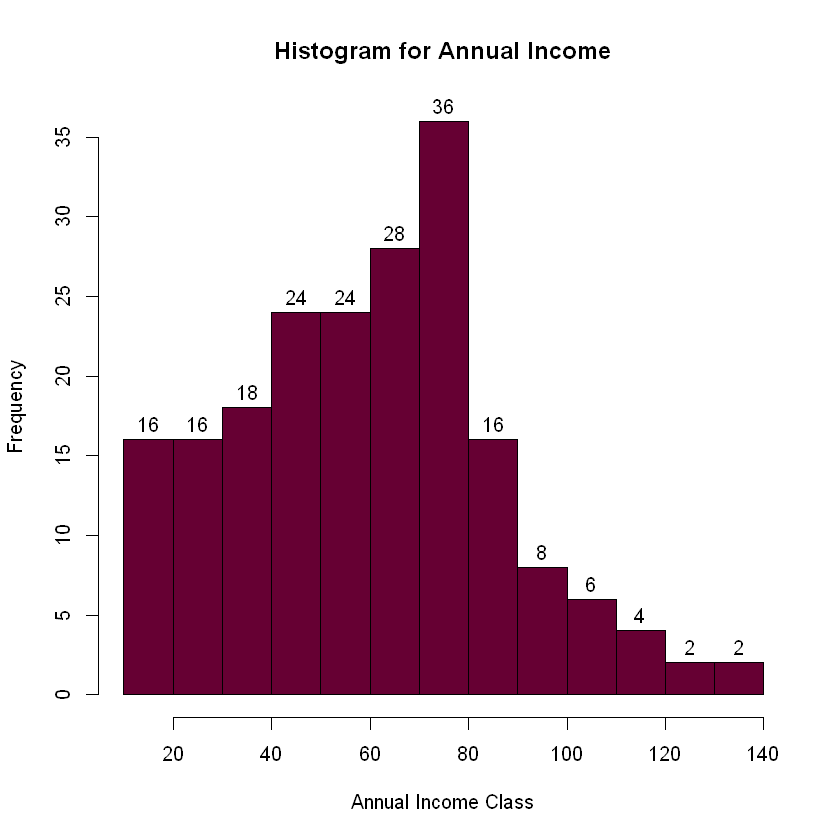

In [29]:
summary(customer_data_raw$Annual.Income..k..)
hist(customer_data_raw$Annual.Income..k..,
  col="#660033",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

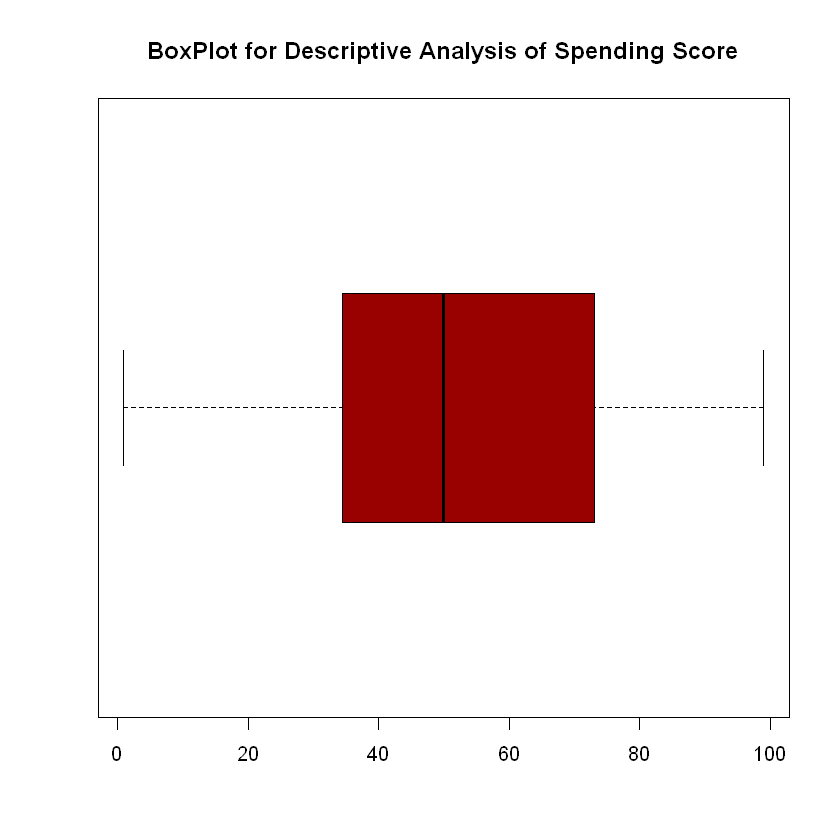

In [30]:
summary(customer_data_raw$Spending.Score..1.100.)

boxplot(customer_data_raw$Spending.Score..1.100.,
   horizontal=TRUE,
   col="#990000",
   main="BoxPlot for Descriptive Analysis of Spending Score")

K MEANS
===============


K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.


**Determining Optimal Clusters**

To determine the optimal number of clusters there are a couple of methods:

- Elbow method
- Silhouette method
- Gap statistic


**Elbow Method**

The main goal behind cluster partitioning methods like k-means is to define the clusters such that the intra-cluster variation stays minimum.

minimize(sum W(Ck)), k=1…k

Where Ck represents the kth cluster and W(Ck) denotes the intra-cluster variation. With the measurement of the total intra-cluster variation, one can evaluate the compactness of the clustering boundary. 

We can then proceed to define the optimal clusters as follows –

1.First, we calculate the clustering algorithm for several values of k. This can be done by creating a variation within k from 1 to 10 clusters. We then calculate the total intra-cluster sum of square (iss). 

2.Then, we proceed to plot iss based on the number of k clusters. This plot denotes the appropriate number of clusters required in our model. 

3.In the plot, the location of a bend or a knee is the indication of the optimum number of clusters.

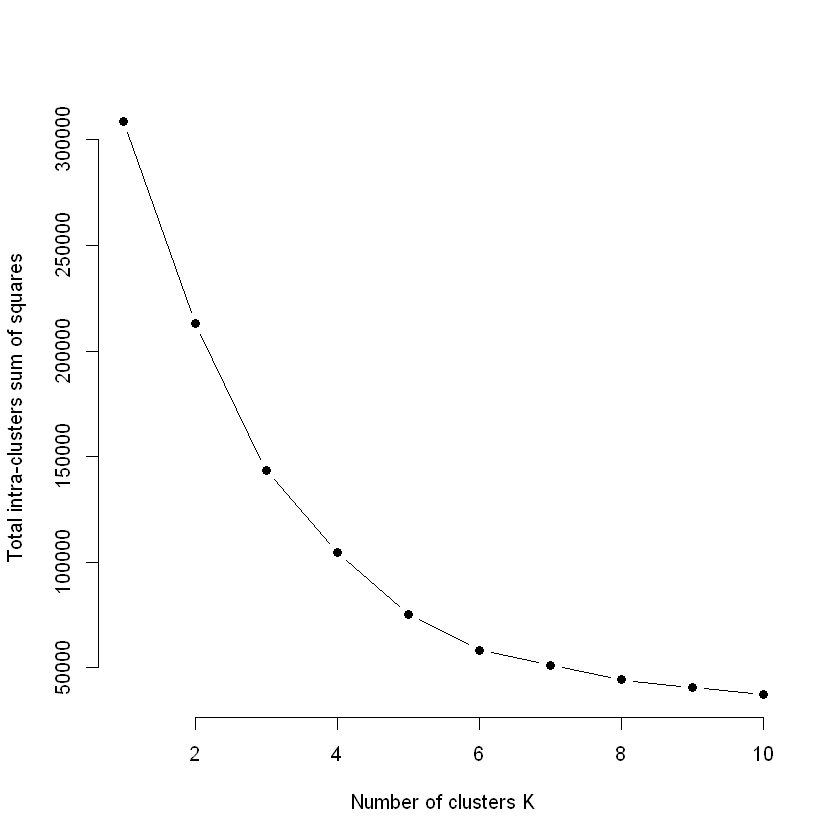

In [31]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square 
iss <- function(k) {
  kmeans(customer_data_raw[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}
k.values <- 1:10
iss_values <- map_dbl(k.values, iss)
plot(k.values, iss_values,
    type="b", pch = 19, frame = FALSE, 
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")

Loading required package: NbClust
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'NbClust'"Warning message:
"package 'factoextra' was built under R version 3.5.3"Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


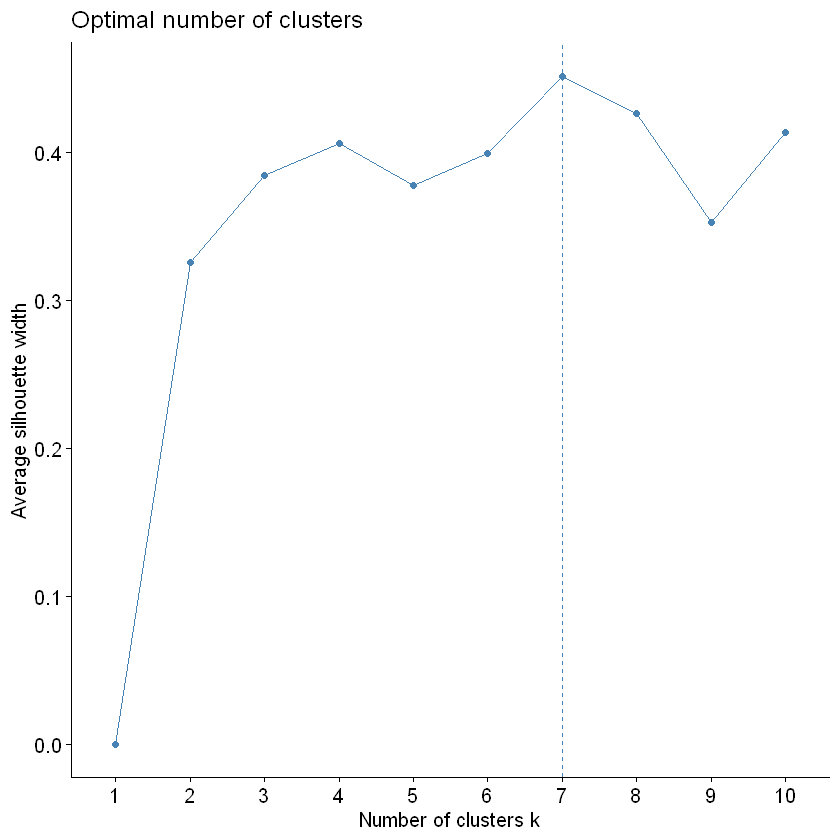

In [36]:

require(NbClust)
library(factoextra)
fviz_nbclust(customer_data_raw[,3:5], kmeans, method = "silhouette")

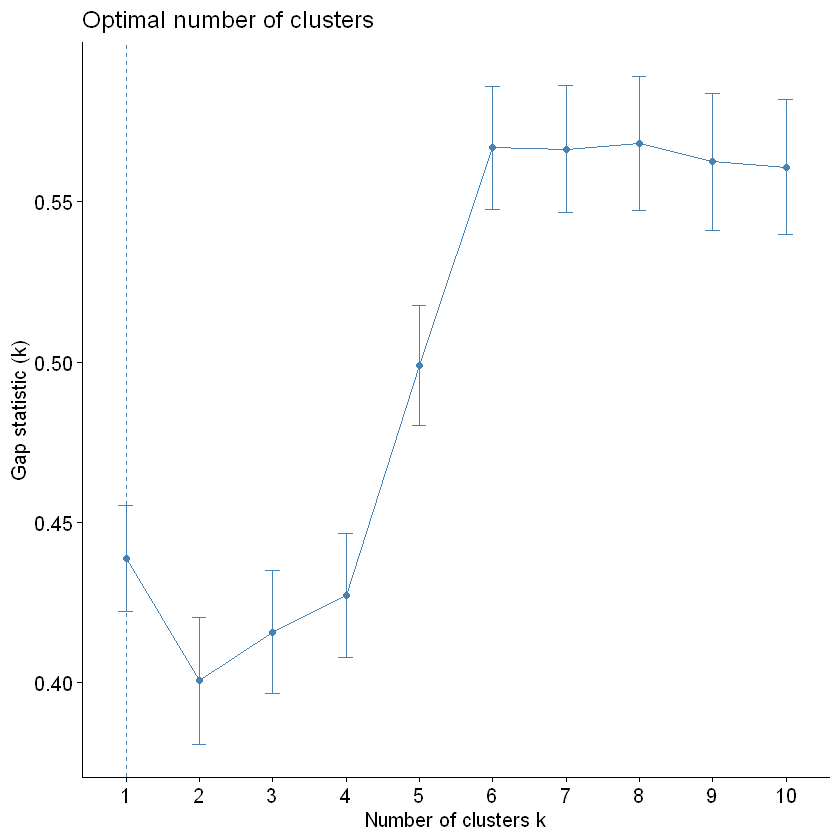

In [44]:

require(factoextra)
library(cluster)

set.seed(125)
stat_gap <- clusGap(customer_data_raw[,3:5], FUN = kmeans, nstart = 25,
            K.max = 10, B = 50)
fviz_gap_stat(stat_gap)

In [45]:
k6<-kmeans(customer_data_raw[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 38, 45, 22, 21, 39, 35

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 27.00000           56.65789               49.13158
2 56.15556           53.37778               49.08889
3 25.27273           25.72727               79.36364
4 44.14286           25.14286               19.52381
5 32.69231           86.53846               82.12821
6 41.68571           88.22857               17.28571

Clustering vector:
  [1] 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 [38] 3 4 3 2 3 2 1 4 3 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 [75] 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
[112] 1 1 1 1 1 2 2 2 2 1 1 1 5 1 5 6 5 6 5 6 5 1 5 6 5 6 5 6 5 6 5 1 5 6 5 6 5
[149] 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6
[186] 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5

Within cluster sum of squares by cluster:
[1]  7742.895  8062.133  4099.818  7732.381 139

In [46]:
pcclust=prcomp(customer_data_raw[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)
pcclust$rotation[,1:2]

Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4625 26.1597 12.9317
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


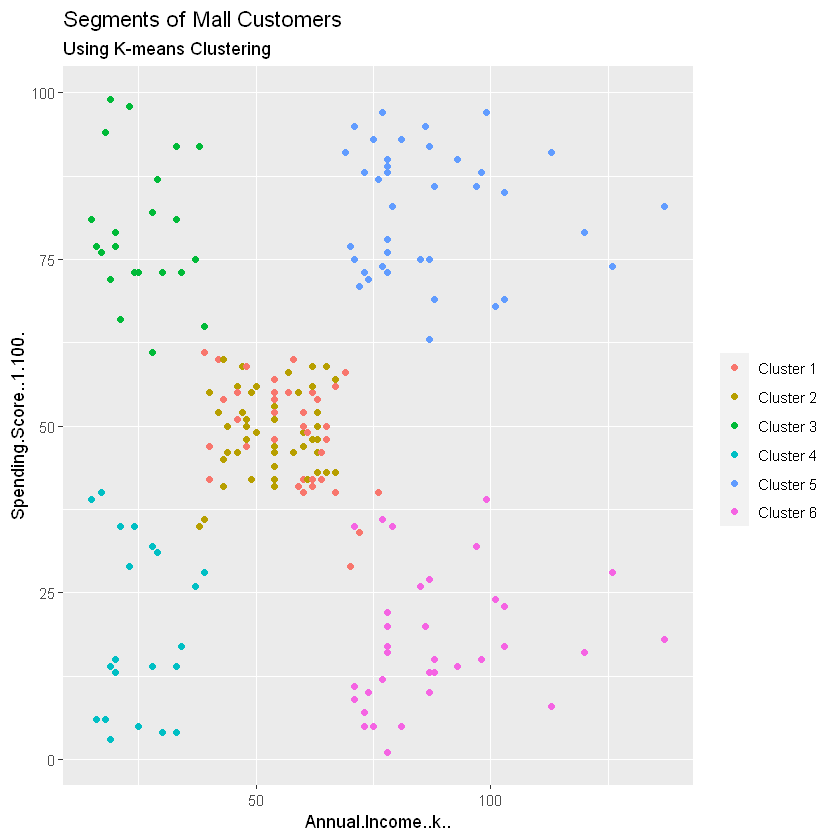

In [48]:
set.seed(1)
ggplot(customer_data_raw, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

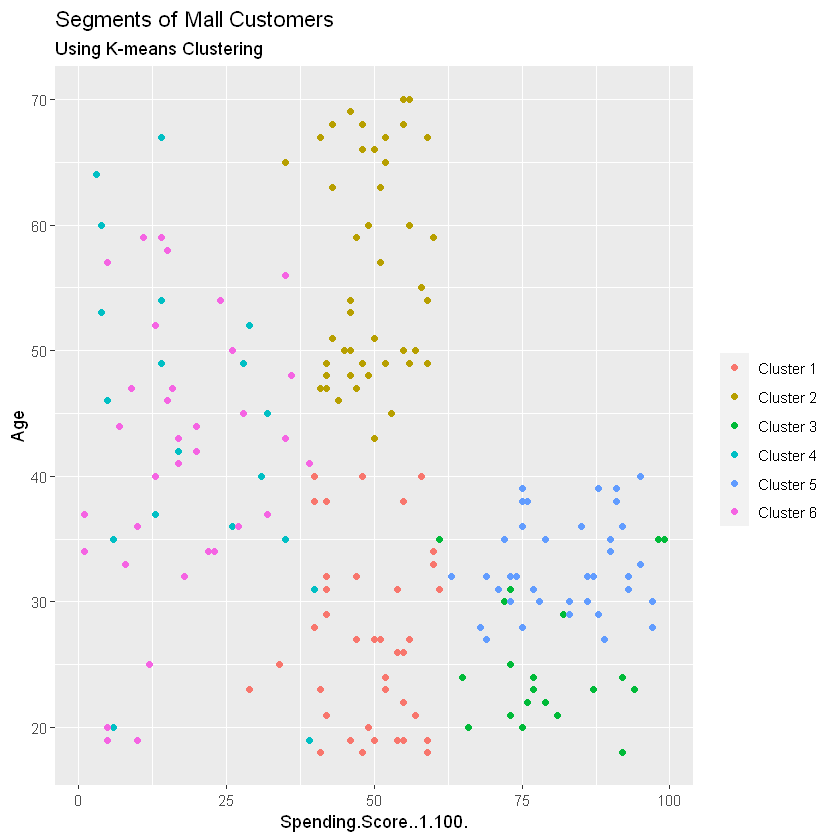

In [49]:
ggplot(customer_data_raw, aes(x =Spending.Score..1.100., y =Age)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                      breaks=c("1", "2", "3", "4", "5","6"),
                      labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")